### 경희대학교 산업경영공학과 2015100915 김태호

# LOL 플레이어의 실력 분석

BeautifulSoup와 urllib, selenium을 사용하여 플레이어의 데이터가 있는 op.gg에서 데이터를 가져와 LOL플레이어의 최근 100경기의 데이터 분석한다.

### 사용방법
- 코드를 실행하고 아래에 "소환사명을 입력해주세요.: "가 나오면 소환사명을 입력해 주세요.(ex. 황토매트)

In [1]:
username = input("소환사명을 입력해주세요.: ")

소환사명을 입력해주세요.: 황토매트


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import seaborn as sns
from selenium import webdriver
import urllib.request
import urllib.parse
import time

In [3]:
url1 = "http://www.op.gg/summoner/userName=" #한글을 제외한 주소를 url1에 저장
#parse모듈을 사용해 한글부분을 유니코드로 치환
url2 = urllib.parse.quote_plus(str(username)) 
url = url1 + url2
driver = webdriver.Chrome('chromedriver.exe')
driver.get(url)

### op.gg에 서머너 이름 검색 후 최근전적부터 100번의 게임정보 가져오기

In [4]:
xpath = """//*[@id="SummonerRefreshButton"]"""
driver.find_element_by_xpath(xpath).click() # 최근전적으로 갱신하기
time.sleep(10)
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[4]/a"""
        driver.find_element_by_xpath(xpath).click() # 전적 추가로 보기 버튼 누르기
        break
    except:
        continue
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[5]/a"""
        driver.find_element_by_xpath(xpath).click() # 전적 추가로 보기 버튼 누르기
        break
    except:
        continue
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[6]/a"""
        driver.find_element_by_xpath(xpath).click() # 전적 추가로 보기 버튼 누르기
        break
    except:
        continue
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[7]/a"""
        driver.find_element_by_xpath(xpath).click() # 전적 추가로 보기 버튼 누르기
        break 
    except:
        continue        
time.sleep(5)

html 모두 긁어오기

In [5]:
page = driver.page_source
soup = BeautifulSoup(page, "html.parser")

# print(soup.prettify()) 를 통해 확인할 수 있다

## 랭크게임 티어와 랭킹알아보기

In [6]:
import re #정규식
from IPython.display import Image
from IPython.core.display import HTML #이미지 출력
TierImage = soup.find('div','Medal').find('img','Image')
TierImage = TierImage['src']
TierImage = "https:" + TierImage
soup.find('div','Medal') #티어 이미지
try:
    soup.find('div','LadderRank') #래더 랭크
    LadderRank = soup.find('div','LadderRank').get_text()
    LadderRank = re.split(('\n|\t'), LadderRank)
    LadderRank = "".join(LadderRank)
except:
    LadderRank = '랭크기록이 없습니다.'
soup.find('div','SummonerRatingMedium') #랭크게임 정보
SummonerRatingMedium = soup.find('div','SummonerRatingMedium').get_text()
SummonerRatingMedium = re.split(('\n|\t'), SummonerRatingMedium)
SummonerRatingMedium = " ".join(SummonerRatingMedium)
SummonerRatinglist = SummonerRatingMedium.strip().split('/')

In [55]:
print("===>> 소환사명 : ", username)
print("===>>", LadderRank)
print("===>>", SummonerRatinglist[0])
print("===>>", SummonerRatinglist[1].strip())
Image(url= TierImage)

===>> 소환사명 :  황토매트
===>> 래더 랭킹 1,738,557위 (상위 58%)
===>> 솔로랭크 Silver 3       8 LP            
===>> 146승 164패  승률 47%       직스의 칼날단


## 모스트 챔피언 분석하기

In [8]:
soup.find('div','MostChampionContent')

Champ = [] ; CS = [] ; KDARatio = [] ; tmp = [] ; K = [] ; D = [] ; A = [] ; WinRatio = [] ; PlayedGames = []
span = ['Kill','Death','Assist','KDA']
dict_tmp = {'ChampionName':Champ,'ChampionMinionKill':CS,'KDA':KDARatio,'Kill':K,'Death':D,'Assist':A, 
            'WinRatio':WinRatio,'Title':PlayedGames}

for x,y in dict_tmp.items():
    if x in span:
        tmp = soup.find('div','MostChampionContent').find_all('span',x)
    else:
        tmp = soup.find('div','MostChampionContent').find_all('div',x)
    for i in tmp:
        tmp = re.split(('\n|\t'),i.get_text())
        tmp = [n for n in tmp if n][0]
        y.append(tmp)
    y

In [9]:
MostChampionContent_df = {'Champ':Champ, 'CS':CS, 'KDARatio':KDARatio, 'K':K,'D':D,'A':A
                          , 'WinRatio':WinRatio, 'PlayedGames':PlayedGames}
MCC_df = pd.DataFrame(MostChampionContent_df)
MCC_df.set_index('Champ',inplace=True)
print('가장 많이 플레이한 챔피언')
MCC_df

가장 많이 플레이한 챔피언


,CS,KDARatio,K,D,A,WinRatio,PlayedGames
Champ,,,,,,,
세트,CS 138.0 (5.2),2.41:1,4.0,4.1,5.8,58%,48 게임
바이,CS 124.3 (4.8),2.30:1,5.2,5.1,6.5,50%,38 게임
미스 포츈,CS 210.9 (8.2),3.89:1,8.4,3.9,6.8,78%,23 게임
직스,CS 164.9 (5.7),2.41:1,3.5,4.6,7.6,38%,21 게임
진,CS 213.2 (7.3),3.96:1,6.3,3.9,9.3,53%,17 게임
레오나,CS 34.8 (1.3),3.91:1,2.4,3.3,10.6,75%,16 게임
아트록스,CS 147.3 (4.8),1.48:1,3.5,6.3,5.8,43%,14 게임


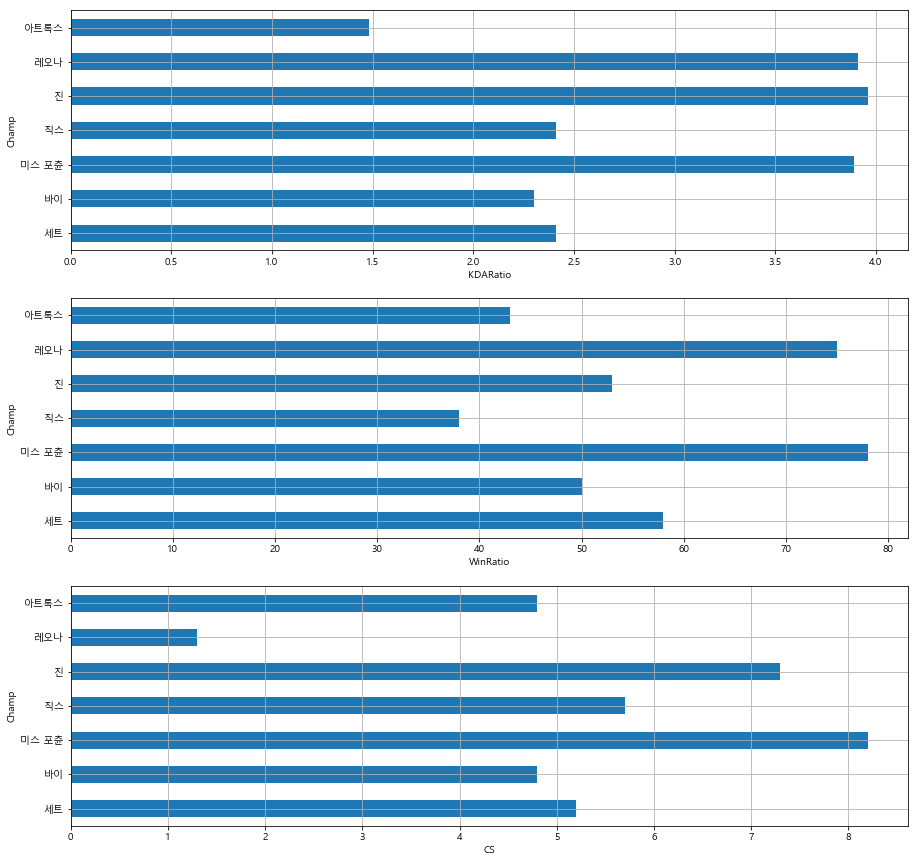

In [10]:
KDARatio_fl = [] ; WinRatio_fl = [] ; PlayedGames_fl = []
for i in KDARatio:
    tmp = re.split((':1|%'),i)
    tmp = [n for n in tmp if n][0]
    KDARatio_fl.append(tmp)
for i in WinRatio:
    tmp = re.split((':1|%'),i)
    tmp = [n for n in tmp if n][0]
    WinRatio_fl.append(tmp)
for i in PlayedGames:
    tmp = re.split((' 게임'),i)
    tmp = [n for n in tmp if n][0]
    PlayedGames_fl.append(tmp)
CS_new = []
n = 0
while n < len(list(MCC_df.index)):
    sw = 0
    k = ''
    tmp = MCC_df['CS'][n]
    for i in tmp:
        if i == '(':
            sw = 1
        if sw == 1:
            k += i
    CS_new.append(k.strip('(|)'))
    n += 1

ForGragh = {'Champ':Champ,'CS':CS_new,'KDARatio':KDARatio_fl, 'WinRatio':WinRatio_fl, 'PlayedGames':PlayedGames_fl}
ForGragh = pd.DataFrame(ForGragh)
ForGragh['KDARatio'] = ForGragh['KDARatio'].astype(float)
ForGragh['WinRatio'] = ForGragh['WinRatio'].astype(float)
ForGragh['PlayedGames'] = ForGragh['PlayedGames'].astype(float)
ForGragh['CS'] = ForGragh['CS'].astype(float)
ForGragh = ForGragh.set_index('Champ').sort_values(by=['PlayedGames'], axis=0, ascending=False)
plt.figure()
plt.subplot(311)
ForGragh['KDARatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('KDARatio')
plt.subplot(312)
ForGragh['WinRatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('WinRatio')
plt.subplot(313)
ForGragh['CS'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('CS')
plt.show()

## 최근 100경기 분석하기

In [11]:
soup.find('div','GameItemList').find_all('div','GameItemWrap')
Champ = [] ; GameType = [] ; CS = [] ; KDARatio_ = [] ; tmp = [] ; K = [] ; D = [] ; A = [] 
CKRate_ = [] ; GameResult = [] 
span = ['Kill','Death','Assist','KDARatio','CS','Wards']
dict_tmp = {'ChampionName':Champ,'GameType':GameType,'CS':CS,'KDARatio':KDARatio_,'Kill':K,'Death':D,'Assist':A, 
            'CKRate' : CKRate_,'GameResult':GameResult}

for x,y in dict_tmp.items():
    if x in span:
        tmp = soup.find('div','RealContent').find_all('span',x)
    else:
        tmp = soup.find('div','RealContent').find_all('div',x)
    for i in tmp:
        tmp = re.split(('\n|\t'),i.get_text())
        tmp = [n for n in tmp if n][0]
        y.append(tmp)
tmp = []
for i in K:
    if i < '9999999':
        tmp.append(i)
K = tmp        
KDARatio_ = KDARatio_[1:]
K = K[1:]
D = D[1:]
A = A[1:]

Recent_Games = {'ChampionName':Champ,'GameType':GameType,'CS':CS,'KDARatio':KDARatio_,'K':K,
                          'D':D,'A':A, 'CKRate' : CKRate_,'GameResult':GameResult}
Recent_Games = pd.DataFrame(Recent_Games)
Recent_Games.set_index('ChampionName',inplace=True)
# 분석하기 쉽게 전처리
CS_min = []
n = 0
while n < len(list(Recent_Games.index)):
    sw = 0
    k = ''
    tmp = CS[n]
    for i in tmp:
        if i == '(':
            sw = 1
        if sw == 1:
            k += i
    CS_min.append(k.strip('(|)'))
    n += 1
KDARatio = []
for i in KDARatio_:
    tmp = re.split((':1'),i)
    KDARatio.append(tmp[0])
CKRate = []
for i in CKRate_:
    tmp = re.split(('%|킬관여 '),i)
    CKRate.append(tmp[1])

    Recent_Games2 = {'ChampionName':Champ,'GameType':GameType,'CS_min':CS_min,'KDARatio':KDARatio,'K':K,
                          'D':D,'A':A, 'CKRate' : CKRate,'GameResult':GameResult}
Recent_Games2 = pd.DataFrame(Recent_Games2)
Recent_Games2.set_index('ChampionName',inplace=True)

Recent_Games2['CS_min'] =Recent_Games2['CS_min'].astype(float) 
Recent_Games2['CKRate'] =Recent_Games2['CKRate'].astype(float) 
Recent_Games2['K'] =Recent_Games2['K'].astype(float) 
Recent_Games2['D'] =Recent_Games2['D'].astype(float) 
Recent_Games2['A'] =Recent_Games2['A'].astype(float) 
print('최근 100경기')
Recent_Games2.head()

최근 100경기


,GameType,CS_min,KDARatio,K,D,A,CKRate,GameResult
ChampionName,,,,,,,,
아트록스,솔랭,3.3,2.00,7.0,5.0,3.0,42.0,패배
바이,솔랭,3.9,1.60,3.0,10.0,13.0,59.0,패배
진,솔랭,7.4,7.67,12.0,3.0,11.0,49.0,승리
아트록스,솔랭,5.1,2.20,3.0,5.0,8.0,31.0,승리
아트록스,솔랭,4.9,0.43,3.0,7.0,0.0,50.0,패배


### 100경기 평균 기록

In [12]:
Total_vic = list(Recent_Games2['GameResult']).count('승리')
Total_def = list(Recent_Games2['GameResult']).count('패배')
Total_wr = Total_vic/(Total_vic+Total_def)*100

Total_wr = round(Total_wr,2)
Total_KDA = round((Recent_Games2['K'].sum()+Recent_Games2['A'].sum())/Recent_Games2['D'].sum(),2)
Total_cs = round(Recent_Games2['CS_min'].mean(),2)
Total_CKRate = round(Recent_Games2['CKRate'].mean(),2)
print("===>> 최근 100경기 승률 : {}%\n===>> 평점 : {}점\n===>> 평균 분당cs : {}개\n===>> 평균 킬관여율 : {}%"
      .format(Total_wr,Total_KDA,Total_cs,Total_CKRate))

===>> 최근 100경기 승률 : 41.41%
===>> 평점 : 2.03점
===>> 평균 분당cs : 4.06개
===>> 평균 킬관여율 : 44.85%


### 챔피언별 기록

In [27]:
grouped = Recent_Games2[['CS_min','K','D','A','CKRate']].groupby(level = 0) 
Recent_Games3 = grouped.mean()
Recent_Games3['KDA'] = (Recent_Games3['K']+Recent_Games3['A'])/Recent_Games3['D']
Recent_Games3 = Recent_Games3.applymap(lambda x : round(x,2)) 
Recent_Games3['PlayedGames'] = grouped.count()['CS_min']

In [28]:
# GameResult 와 index를 key로 만든후 카운트 한다.
grouped2 = Recent_Games2[['K']].groupby([Recent_Games2.index,Recent_Games2['GameResult']]) 
grouped3 = grouped2.count()

WinRatio = []
for tmp in Recent_Games3.index:
    try:
        grouped_vic = grouped3.loc[(tmp,'승리'), 'K'] 
    except:
        grouped_vic = 0
    try:
        grouped_def = grouped3.loc[(tmp,'패배'), 'K'] 
    except:
        grouped_def = 0
    grouped_wr = grouped_vic/(grouped_vic+grouped_def)*100
    grouped_wr = round(grouped_wr,2)
    WinRatio.append(grouped_wr)
Recent_Games3['WinRatio'] = WinRatio
Recent_Games3 = Recent_Games3[Recent_Games3['PlayedGames'] >= 5].sort_values(by=['PlayedGames'], axis=0, ascending=False)
Recent_Games3

,CS_min,K,D,A,CKRate,KDA,PlayedGames,WinRatio
ChampionName,,,,,,,,
바이,4.84,5.50,5.73,6.77,48.91,2.14,22,50.00
아트록스,4.69,3.33,5.87,5.40,37.80,1.49,15,42.86
블리츠크랭크,1.17,2.75,4.83,11.25,55.92,2.90,12,50.00
조이,4.38,4.00,7.44,5.00,39.11,1.21,9,11.11
세트,5.01,5.88,5.25,8.00,39.50,2.64,8,50.00
노틸러스,1.33,2.50,5.50,9.17,48.33,2.12,6,33.33
미스 포츈,7.78,6.40,5.40,8.00,51.20,2.67,5,60.00


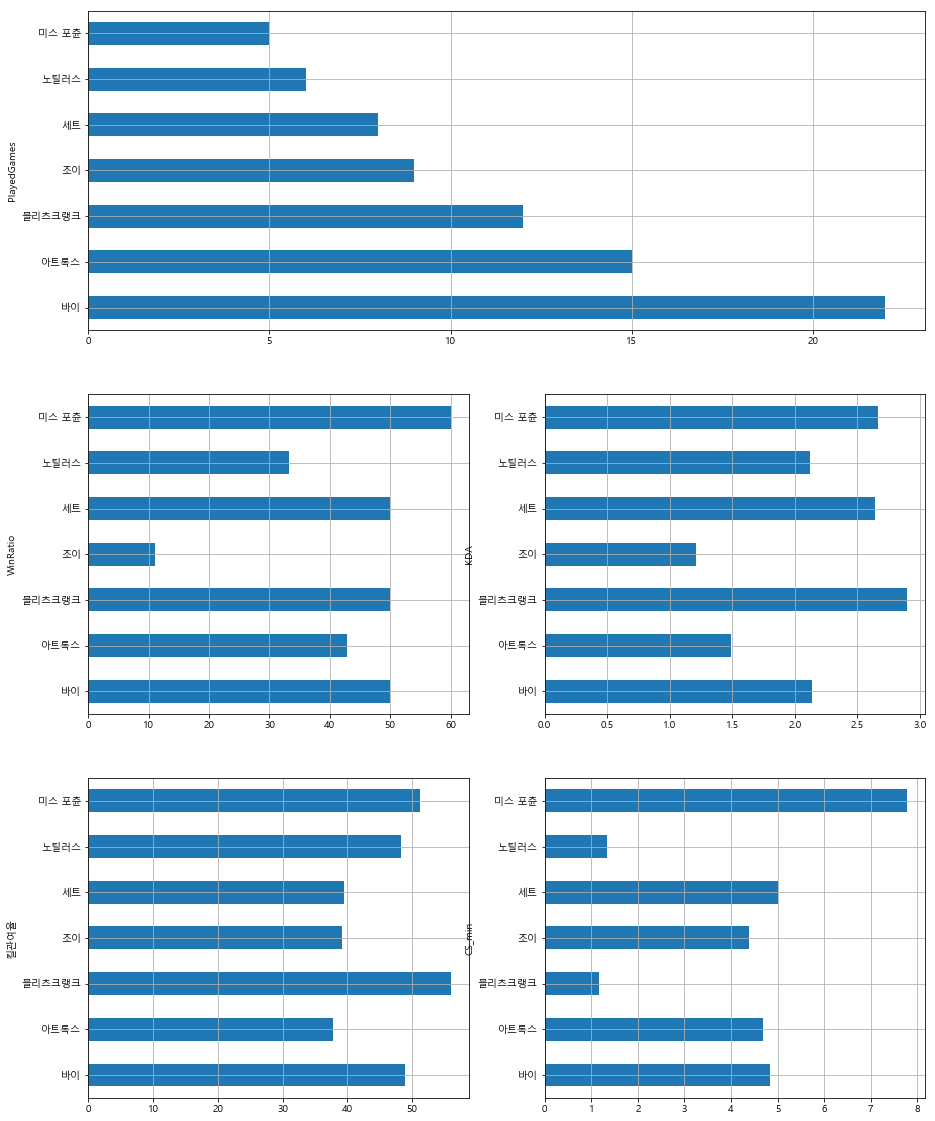

In [16]:
plt.figure()
plt.subplot(311)
Recent_Games3['PlayedGames'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('PlayedGames')
plt.subplot(323)
Recent_Games3['WinRatio'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('WinRatio')
plt.subplot(324)
Recent_Games3['KDA'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('KDA')
plt.subplot(325)
Recent_Games3['CKRate'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('킬관여율')
plt.subplot(326)
Recent_Games3['CS_min'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('CS_min')
plt.show()

# 분석 결과

## 모스트챔피언 분석

In [44]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
print("===>> 소환사명 : ", username)
Image(url= TierImage)
print("===>>", LadderRank)
print("===>>", SummonerRatinglist[0])
print("===>>", SummonerRatinglist[1].strip())

print('가장 많이 플레이한 챔피언')
MCC_df

===>> 소환사명 :  황토매트


===>> 래더 랭킹 1,738,557위 (상위 58%)
===>> 솔로랭크 Silver 3       8 LP            
===>> 146승 164패  승률 47%       직스의 칼날단
가장 많이 플레이한 챔피언


,CS,KDARatio,K,D,A,WinRatio,PlayedGames
Champ,,,,,,,
세트,CS 138.0 (5.2),2.41:1,4.0,4.1,5.8,58%,48 게임
바이,CS 124.3 (4.8),2.30:1,5.2,5.1,6.5,50%,38 게임
미스 포츈,CS 210.9 (8.2),3.89:1,8.4,3.9,6.8,78%,23 게임
직스,CS 164.9 (5.7),2.41:1,3.5,4.6,7.6,38%,21 게임
진,CS 213.2 (7.3),3.96:1,6.3,3.9,9.3,53%,17 게임
레오나,CS 34.8 (1.3),3.91:1,2.4,3.3,10.6,75%,16 게임
아트록스,CS 147.3 (4.8),1.48:1,3.5,6.3,5.8,43%,14 게임


### 그래프

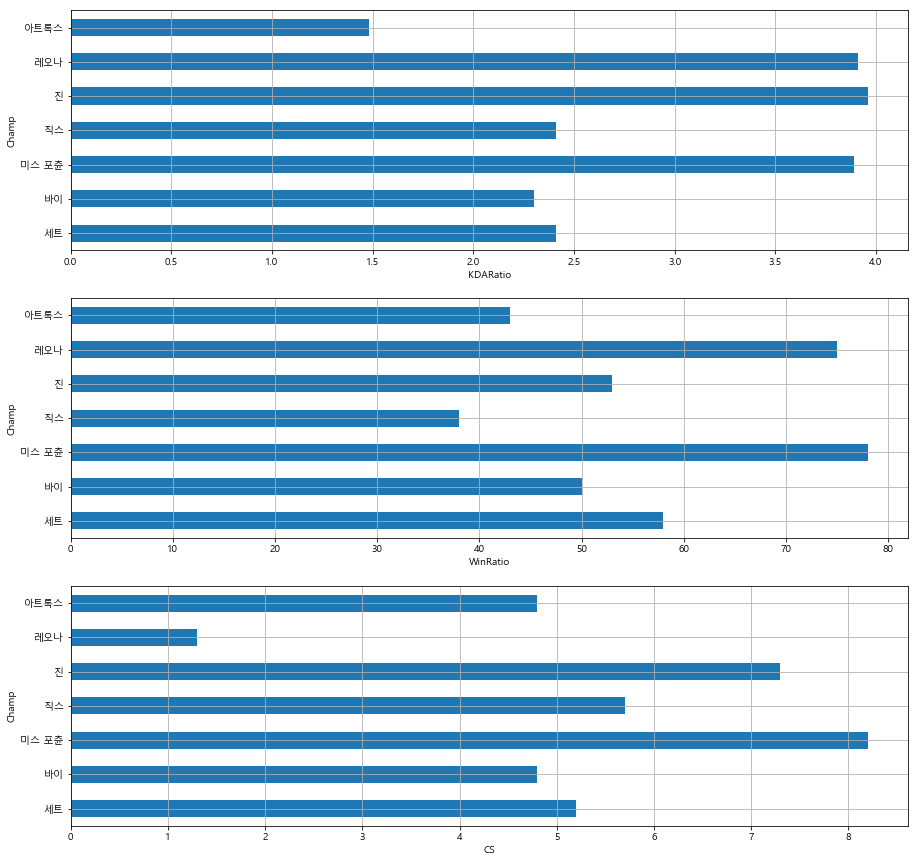

In [46]:
InteractiveShell.ast_node_interactivity = "last"
plt.figure()
plt.subplot(311)
ForGragh['KDARatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('KDARatio')
plt.subplot(312)
ForGragh['WinRatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('WinRatio')
plt.subplot(313)
ForGragh['CS'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('CS')
plt.show()

In [50]:
InteractiveShell.ast_node_interactivity = "all"
print("===>> 최근 100경기 분석(5판이상 플레이한 챔피언 기준)")
Recent_Games3
print("===>> 최근 100경기 승률 : {}%\n===>> 평점 : {}점\n===>> 평균 분당cs : {}개\n===>> 평균 킬관여율 : {}%"
      .format(Total_wr,Total_KDA,Total_cs,Total_CKRate))

===>> 최근 100경기 분석(5판이상 플레이한 챔피언 기준)


,CS_min,K,D,A,CKRate,KDA,PlayedGames,WinRatio
ChampionName,,,,,,,,
바이,4.84,5.50,5.73,6.77,48.91,2.14,22,50.00
아트록스,4.69,3.33,5.87,5.40,37.80,1.49,15,42.86
블리츠크랭크,1.17,2.75,4.83,11.25,55.92,2.90,12,50.00
조이,4.38,4.00,7.44,5.00,39.11,1.21,9,11.11
세트,5.01,5.88,5.25,8.00,39.50,2.64,8,50.00
노틸러스,1.33,2.50,5.50,9.17,48.33,2.12,6,33.33
미스 포츈,7.78,6.40,5.40,8.00,51.20,2.67,5,60.00


===>> 최근 100경기 승률 : 41.41%
===>> 평점 : 2.03점
===>> 평균 분당cs : 4.06개
===>> 평균 킬관여율 : 44.85%


## 그래프

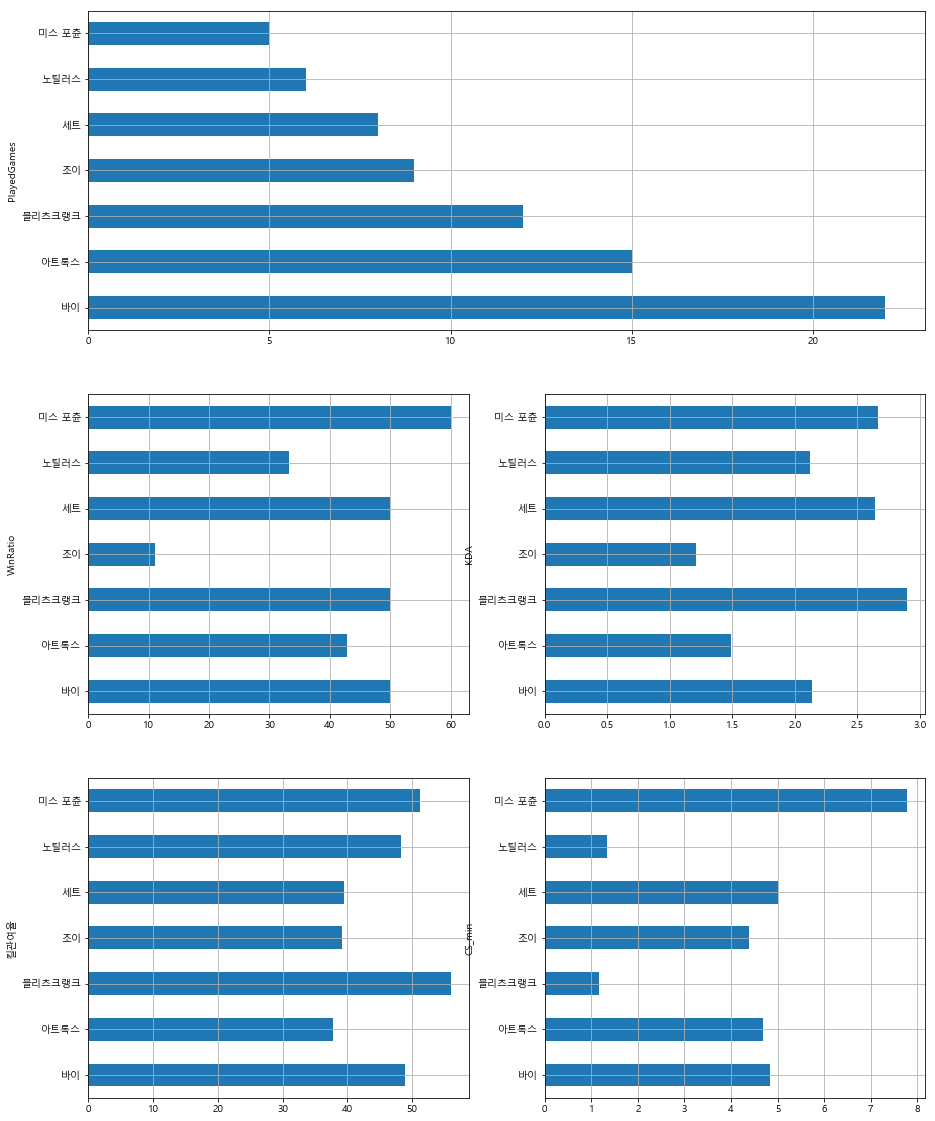

In [53]:
InteractiveShell.ast_node_interactivity = "last"
plt.figure()
plt.subplot(311)
Recent_Games3['PlayedGames'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('PlayedGames')
plt.subplot(323)
Recent_Games3['WinRatio'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('WinRatio')
plt.subplot(324)
Recent_Games3['KDA'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('KDA')
plt.subplot(325)
Recent_Games3['CKRate'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('킬관여율')
plt.subplot(326)
Recent_Games3['CS_min'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('CS_min')
plt.show()